## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Author: Xaltius Pte. Ltd. 
Copyright Xaltius Pte. Ltd., 2018
### Editor: AMARTYA PANDEY
**Not for distribution.**

In [2]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [7]:
# Reading data from remote link
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(100)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

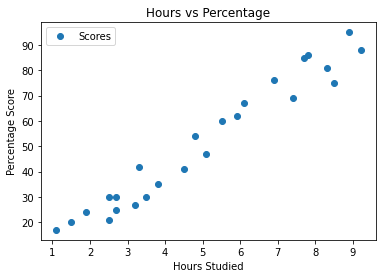

In [8]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()


**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [15]:
X = s_data.iloc[:, :-1].values 
y = s_data.iloc[:, 1].values
print(X)
print("................")
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
................
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [25]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.15, random_state=0) 

In [26]:
print(X_train,"xx\n", X_test,"xx\n", y_train,"xx\n", y_test)

[[5.9]
 [3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]] xx
 [[1.5]
 [3.2]
 [7.4]
 [2.5]] xx
 [62 35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41] xx
 [20 27 69 30]


### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [27]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.




 Equation of Line is  9.92 *X+ 2.049688128927201 




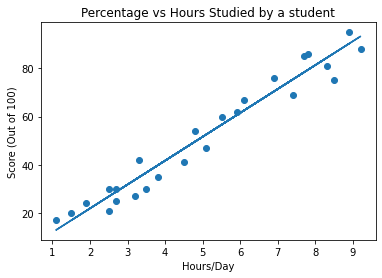

In [43]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

print("\n\n Equation of Line is ", '{0:.3g}'.format(regressor.coef_[0]),"*X+",regressor.intercept_,"\n\n")
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line)
#  style='o')  
plt.title('Percentage vs Hours Studied by a student')  
plt.xlabel("Hours/Day")
plt.ylabel("Score (Out of 100)")
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [44]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]]
[16.92714815 33.7882695  75.44515755 26.84545482]


In [51]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.927148
1,27,33.788269
2,69,75.445158
3,30,26.845455


In [57]:
# You can also test with your own data
hours = [[9.25]]
own_pred = regressor.predict(hours)
print(own_pred)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {0:.3g}".format(own_pred[0]))

[93.7940249]
No of Hours = 9.25
Predicted Score = 93.8


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [63]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
# print('Mean Absolute Error:', 
#       metrics.mean_absolute_error(X_test, X_train))      

Mean Absolute Error: 4.865206019265337
